In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file
data = pd.read_csv('data/beerwiser/csv/dependencies.csv', delimiter=';')

In [4]:
data

,destination,argument_1,argument_2,operator,maximum_effect,accessibility,probability_of_success,saturation_point
0,Accidents reduction %,Invest in training of employees,NaN,squeezed *,0.48,0.95,0.9,300000.0
1,Water use reduction % when effective,Invest in water recycling,NaN,squeezed *,0.50,1.00,1.0,275000.0
2,Water use reduction %,Water use reduction % when effective,Effectiveness water recycling,*,NaN,NaN,NaN,NaN
3,Accidents reduction,Current # accidents,Accidents reduction %,*,NaN,NaN,NaN,NaN
4,Water use reduction,Water use reduction %,Current water use,*,NaN,NaN,NaN,NaN
5,Production cost reduction $,Water use reduction,Water unit cost,*,NaN,NaN,NaN,NaN
6,Production cost reduction $,Accidents reduction,Cost of accident,*,NaN,NaN,NaN,NaN
7,Production cost reduction,Production cost reduction $,Current production cost,/,NaN,NaN,NaN,NaN
8,Cost of training per employee,Invest in training of employees,# employees,/,NaN,NaN,NaN,NaN
9,New # accidents,Current # accidents,Accidents reduction,-,NaN,NaN,NaN,NaN


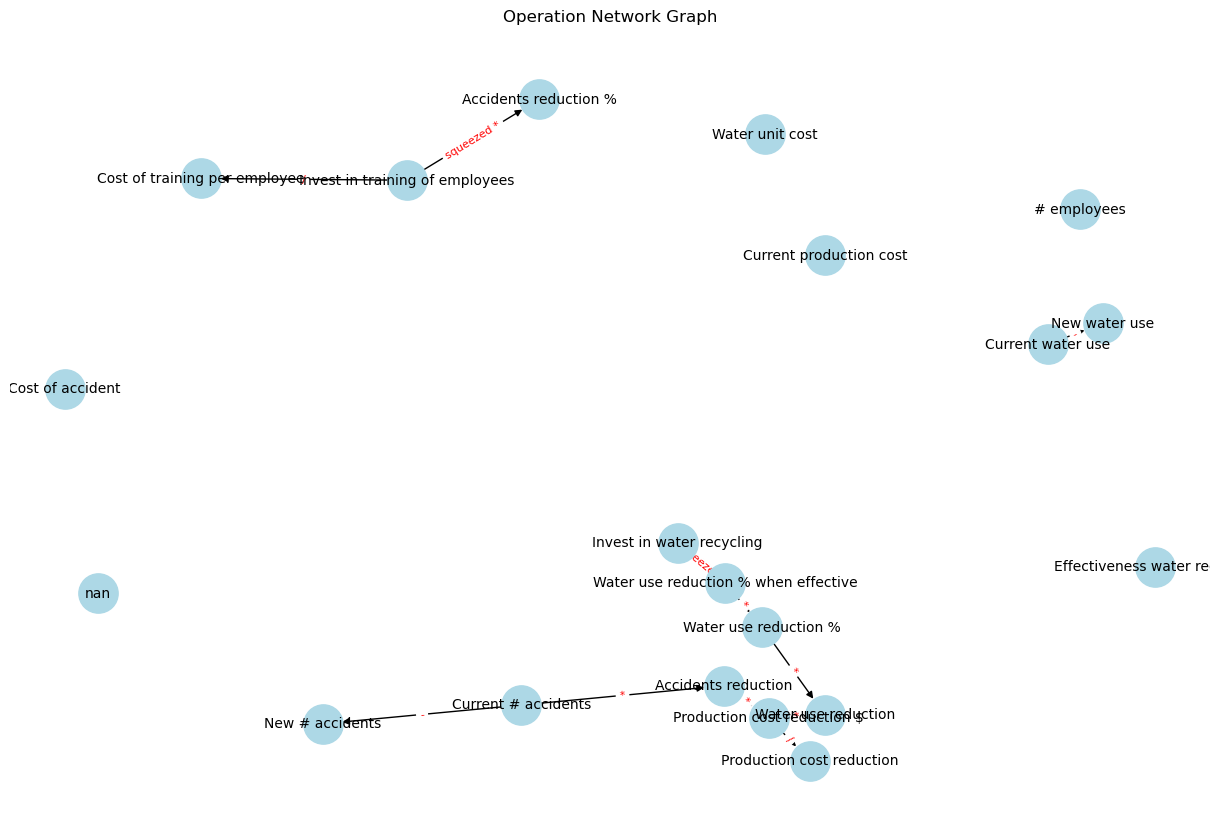

In [5]:
# Initialize a directed graph
G = nx.DiGraph()

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination)
    G.add_node(argument_1)
    G.add_node(argument_2)
    
    # Add an edge from argument_1 to destination with the operator as the label
    G.add_edge(argument_1, destination, operator=operator)

# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'operator')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
plt.title('Operation Network Graph')
plt.show()
